# IGRINS CA1 demo

Here we demonstrate the diffraction theory of CA-1, the IGRINS immersion grating.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%config InlineBackend.figure_format='retina'

### Fixed physical properties

In [2]:
sigma = 27.36 # micron

In [3]:
groove_top_width = 9.95 # micron

In [4]:
blaze_angle_radians = np.arctan(3) # radians
blaze_angle_degrees = np.degrees(blaze_angle_radians)
blaze_angle_degrees

71.56505117707799

Assume testing in back-surface reflection in visible light!

In [5]:
wavelength_micron = 0.632 # micron

In [6]:
beam_size_mm = 0.5 # mm
beam_size_micron = beam_size_mm*1000.0

Fix the angle of incidence for now.

In [7]:
theta_i_degrees = 11.2
theta_i_radians = np.radians(theta_i_degrees)

### Compute the diffraction from a mirror

The width of the diffraction peak depends on the size of the mirror.

In [8]:
beam_size_radians = np.arcsin(wavelength_micron / (beam_size_mm * 1000.0))
beam_size_degrees = np.degrees(beam_size_radians)
beam_size_degrees

0.07242188458923733

### Set the angular sampling

We want a number that has about 10 steps per beamsize.

In [9]:
degrees_per_step = 0.002 # degrees

In [10]:
angular_grid_degrees = np.arange(-90, 90, degrees_per_step)
angular_grid_radians = np.radians(angular_grid_degrees)

In [11]:
n_steps = len(angular_grid_degrees)
n_steps

90000

### Visualize diffraction from the mirror
The mirror looks just like a single slit.

$I(\boldsymbol{\theta})/I_0 = \operatorname{sinc}^2 \left[ \frac{d \pi}{\lambda} \sin{(\boldsymbol{\theta}-\theta_i)}\right]$

where $\boldsymbol{\theta}$ are the coordinates at which we are evaluating the flux, and $\theta_i$ is the incidence angle.


In [12]:
rhs_argument = (beam_size_micron*np.pi/(wavelength_micron)*
                np.sin(angular_grid_radians - theta_i_radians))

In [13]:
rhs = np.sinc(rhs_argument)**2

In [14]:
mirror_flux = rhs

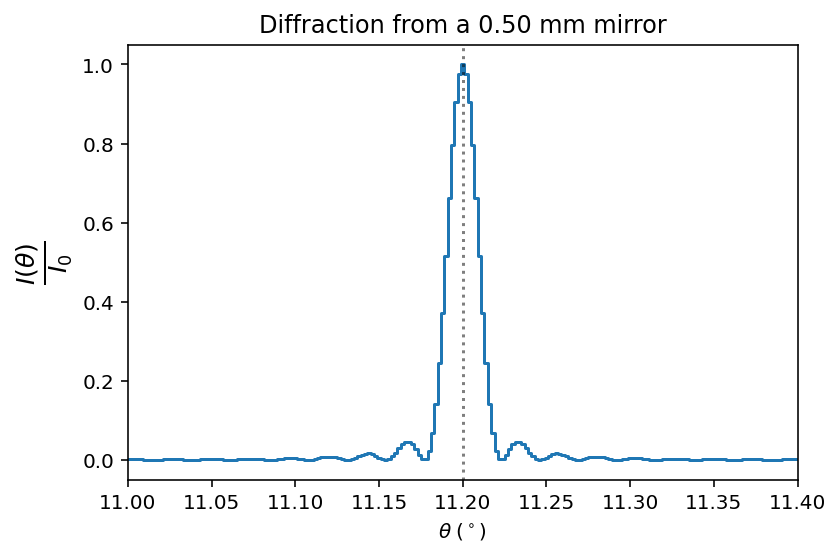

In [15]:
plt.step(angular_grid_degrees, mirror_flux, where='mid')
plt.xlim(theta_i_degrees-0.2, theta_i_degrees+0.2);
plt.xlabel(r'$\theta \; (^\circ)$')
plt.ylabel(r'$\frac{I(\theta)}{I_0}$', fontsize=18)
plt.axvline(theta_i_degrees, linestyle='dotted', color='k', alpha=0.5)
plt.title('Diffraction from a {:0.2f} mm mirror'.format(beam_size_mm) );

### What is the largest physical diffraction order for this grating?

It occurs when the $\sin{\theta_i}-\sin{\theta_m} = 2$ , *i.e.:*  

$$\sin{\theta_m} = -90^{\circ}$$
$$\sin{\theta_i} = 90^{\circ}$$

Proof:  

$\sin{\theta_m} = \left( \sin\theta_i -\frac{m\lambda}{\sigma}\right )$  

$m_{\mathrm{max}} = [\sin{\theta_i}-\sin{\theta_m}] \frac{\sigma}{\lambda}$

$m_{\mathrm{max}} = 2 \frac{\sigma}{\lambda}$

In [16]:
max_m = np.floor(2 * sigma / wavelength_micron)

In [17]:
max_m

86.0

Most of the time we will have even fewer diffraction orders.  For example, at normal incidence $\theta_i=0$, so our maximum $m$ is half that:

In [18]:
np.floor(1 * sigma / wavelength_micron)

43.0

In [19]:
m_vector = np.arange(-max_m, max_m+1, 1)

Note that we are including diffraction orders like $m=-52$ that only exist for some incidence angles.  That's OK! We are being overly-inclusive in case we go to extreme values of $\theta_i$ that reveal some of those presently-unphysical orders.

### Calculate the groove-top diffraction

We will assume that the grating is just a series of slits and voids (ignore the Si facet for now).

Now we compute the angles of the peak of diffraction for the input wavelength.  

$\theta_m = \arcsin{\left( \sin\theta_i -\frac{m\lambda}{\sigma}\right )}$  

Not that next line will produce `NaN`s if the argument inside $\arcsin$ is greater than $1$ or less than $-1$, that is if the diffraction order is unphysically beyond $m_{\mathrm{max}}$.

In [20]:
%%capture
theta_m_radians = np.arcsin(np.sin(theta_i_radians) - m_vector*(wavelength_micron)/sigma)

The locations that are `NaN` indicate there is no physical order there and therefore indicates the largest realized diffraction order:

In [21]:
theta_m_degrees = np.degrees(theta_m_radians)

In [22]:
np.round(theta_m_degrees, decimals=1)

array([  nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,  78.4,  73. ,
        69. ,  65.5,  62.5,  59.8,  57.2,  54.9,  52.6,  50.5,  48.5,
        46.5,  44.6,  42.8,  41. ,  39.3,  37.6,  35.9,  34.3,  32.7,
        31.2,  29.6,  28.1,  26.6,  25.2,  23.7,  22.3,  20.9,  19.4,
        18. ,  16.7,  15.3,  13.9,  12.6,  11.2,   9.9,   8.5,   7.2,
         5.8,   4.5,   3.2,   1.9,   0.5,  -0.8,  -2.1,  -3.4,  -4.8,
        -6.1,  -7.4,  -8.8, -10.1, -11.4, -12.8, -14.2, -15.5, -16.9,
       -18.3, -19.7, -21.1, -22.5, -24. , -25.4, -26.9, -28.4, -29.9,
       -31.5, -33. , -34.6, -36.2, -37.9, -39.6, -41.3, -43.1, -45. ,
       -46.9, -48.8,

In [23]:
finite_mask = np.isfinite(theta_m_radians)

In [24]:
np.max(m_vector[finite_mask]), np.min(m_vector[finite_mask])

(51.0, -34.0)

### Key idea: Numpy broadcasting instead of a `for` loop

In [25]:
theta_m_radians.shape

(173,)

The $\theta_m$ vector is $$(173 \times 1)$$ but it has to become a column vector: $$(1 \times 173)$$ to make the [numpy array broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html) work out:

In [26]:
theta_m_column = theta_m_radians[np.newaxis, :]
theta_m_column.shape

(1, 173)

This will produce a matrix of size $n_{steps}\times n_{m}$, which could exhaust your computer RAM, depending on the sizes of those vectors.

### Visualize the unblazed diffraction from all of these orders

We need to shift-and-sum the flux contribution from all of our diffraction orders.

Each order has a mirror-like diffraction centered on its $\theta_m$:

$$\frac{I_m(\boldsymbol{\theta})}{I_0} = \operatorname{sinc}^2 \left[ \frac{d \pi}{\lambda} \sin{(\boldsymbol{\theta}-\theta_m)}\right]$$

$$\mathrm{"LHS"} = \mathrm{"RHS"}$$

In [27]:
rhs_argument = (beam_size_micron*np.pi/(wavelength_micron)*
                np.sin(angular_grid_radians[:, np.newaxis]-theta_m_column))

There's technically a foreshortening term associated with non-normal-incidence beamsize projection effects.   
Ignore it for now!

$$\frac{I(\boldsymbol{\theta})}{I_0} = \sum_{m_\mathrm{min}}^{m_\mathrm{max}} \operatorname{sinc}^2 \left[ \frac{d \pi}{\lambda} \sin{(\boldsymbol{\theta}-\theta_m)}\right]$$

In [28]:
rhs = np.nan_to_num(np.sinc(rhs_argument)**2, nan=0.0)

In [29]:
unblazed_groove_top_diffraction = np.sum(rhs, axis=1)

### Visualize the *blazed* diffraction from all of these orders

Each order has a mirror-like diffraction centered on its $\theta_m$, calculated above.

In [30]:
blaze_modulation = np.sinc((groove_top_width*np.pi/(wavelength_micron)*
                np.sin(angular_grid_radians - theta_i_radians)))**2

Again, there's an incidence-angle foreshortening effect here...

In [31]:
blazed_groove_top_diffraction = blaze_modulation * unblazed_groove_top_diffraction

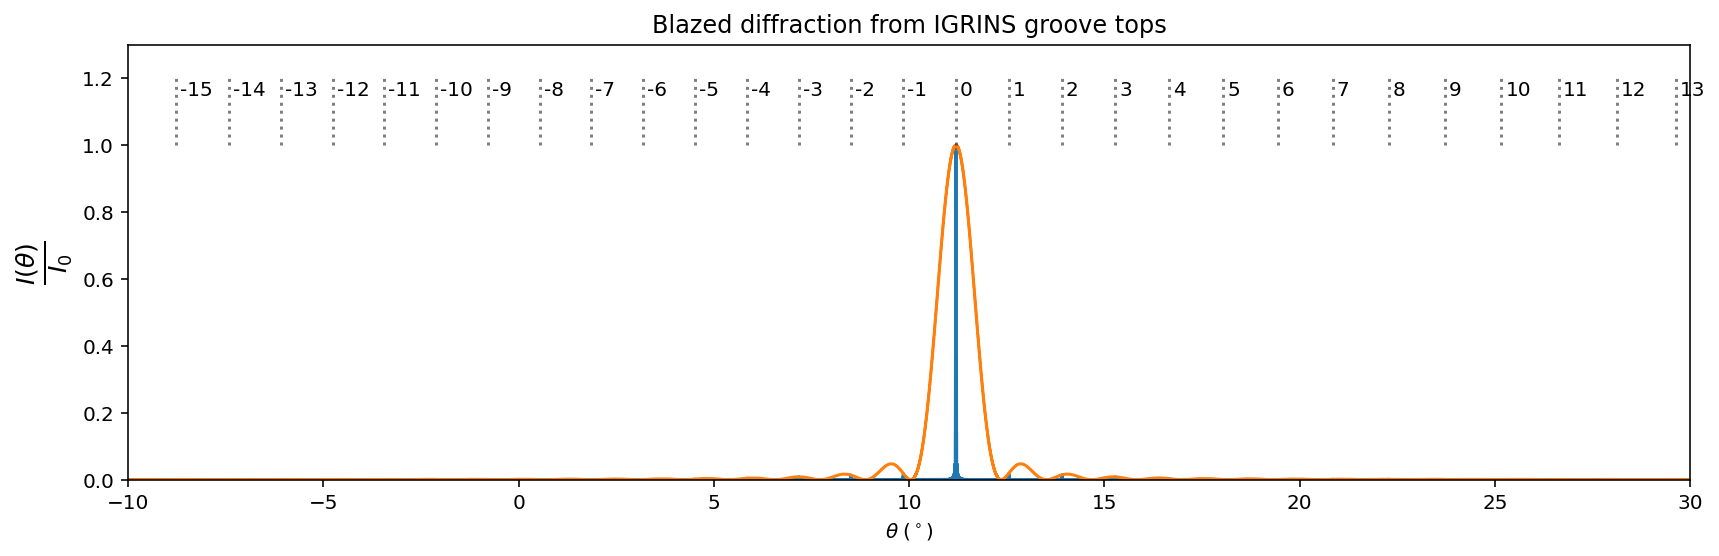

In [32]:
plt.figure(figsize=(14, 4))
plt.step(angular_grid_degrees, blazed_groove_top_diffraction, where='mid')
plt.step(angular_grid_degrees, blaze_modulation, where='mid')

x_lo, x_hi = (-10, 30)
plt.xlim(x_lo, x_hi)
plt.ylim(0, 1.3)

for m, theta_m in zip(m_vector, theta_m_degrees):
    if np.isfinite(theta_m) & (theta_m>x_lo) & (theta_m < x_hi):
        plt.text(theta_m+0.1, 1.15, "{:d}".format(-int(m)), rotation='horizontal')
        plt.plot([theta_m, theta_m], [1.0, 1.2], color='k', alpha=0.5, 
                 linestyle='dotted')

plt.xlabel(r'$\theta \; (^\circ)$')
plt.ylabel(r'$\frac{I(\theta)}{I_0}$', fontsize=18)
plt.title('Blazed diffraction from IGRINS groove tops'.format(beam_size_mm) );

Awesome! What's going on at the extreme other end?

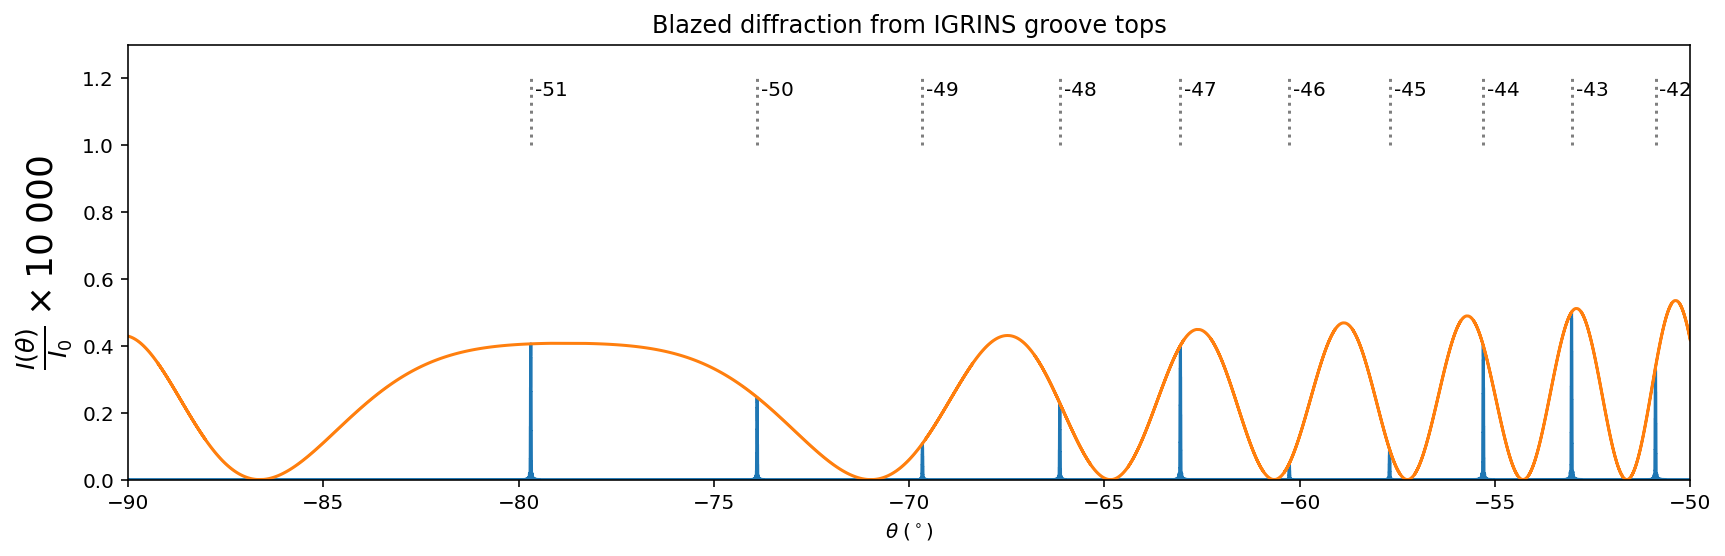

In [33]:
plt.figure(figsize=(14, 4))
plt.step(angular_grid_degrees, blazed_groove_top_diffraction*10000)
plt.step(angular_grid_degrees, blaze_modulation*10000)

x_lo, x_hi = (-90, -50)
plt.xlim(x_lo, x_hi)
plt.ylim(0, 1.3)

for m, theta_m in zip(m_vector, theta_m_degrees):
    if np.isfinite(theta_m) & (theta_m>x_lo) & (theta_m < x_hi):
        plt.text(theta_m+0.1, 1.15, "{:d}".format(-int(m)), rotation='horizontal')
        plt.plot([theta_m, theta_m], [1.0, 1.2], color='k', alpha=0.5, 
                 linestyle='dotted')

plt.xlabel(r'$\theta \; (^\circ)$')
plt.ylabel(r'$\frac{I(\theta)}{I_0} \times 10\;000$', fontsize=18)
plt.title('Blazed diffraction from IGRINS groove tops'.format(beam_size_mm) );

Cool!  How about the other extreme positive end (negative diffraction orders)?

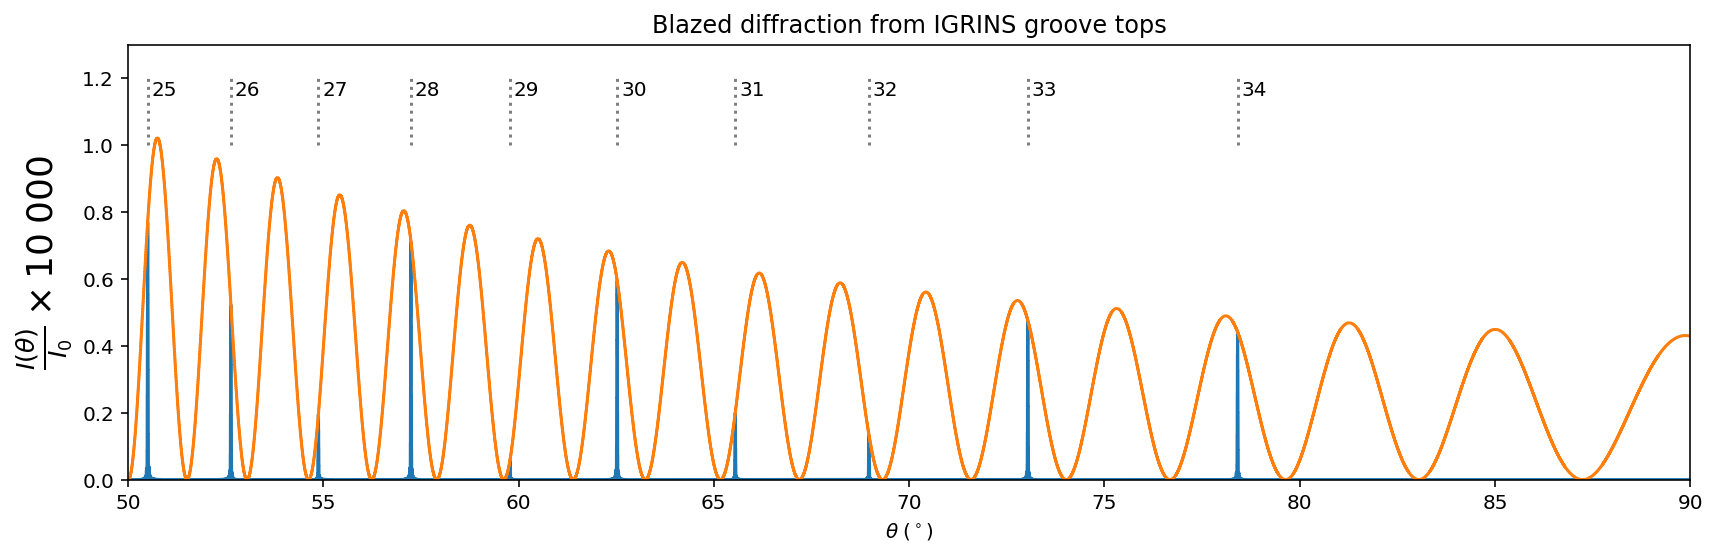

In [34]:
plt.figure(figsize=(14, 4))
plt.step(angular_grid_degrees, blazed_groove_top_diffraction*10000)
plt.step(angular_grid_degrees, blaze_modulation*10000)

x_lo, x_hi = (50, 90)
plt.xlim(x_lo, x_hi)
plt.ylim(0, 1.3)

for m, theta_m in zip(m_vector, theta_m_degrees):
    if np.isfinite(theta_m) & (theta_m>x_lo) & (theta_m < x_hi):
        plt.text(theta_m+0.1, 1.15, "{:d}".format(-int(m)), rotation='horizontal')
        plt.plot([theta_m, theta_m], [1.0, 1.2], color='k', alpha=0.5, 
                 linestyle='dotted')

plt.xlabel(r'$\theta \; (^\circ)$')
plt.ylabel(r'$\frac{I(\theta)}{I_0} \times 10\;000$', fontsize=18)
plt.title('Blazed diffraction from IGRINS groove tops'.format(beam_size_mm) );

Neat!  In this notebook we explored the extents of the blaze envelope and the concept of maximum diffraction order.

Let's look at the whole range in log space

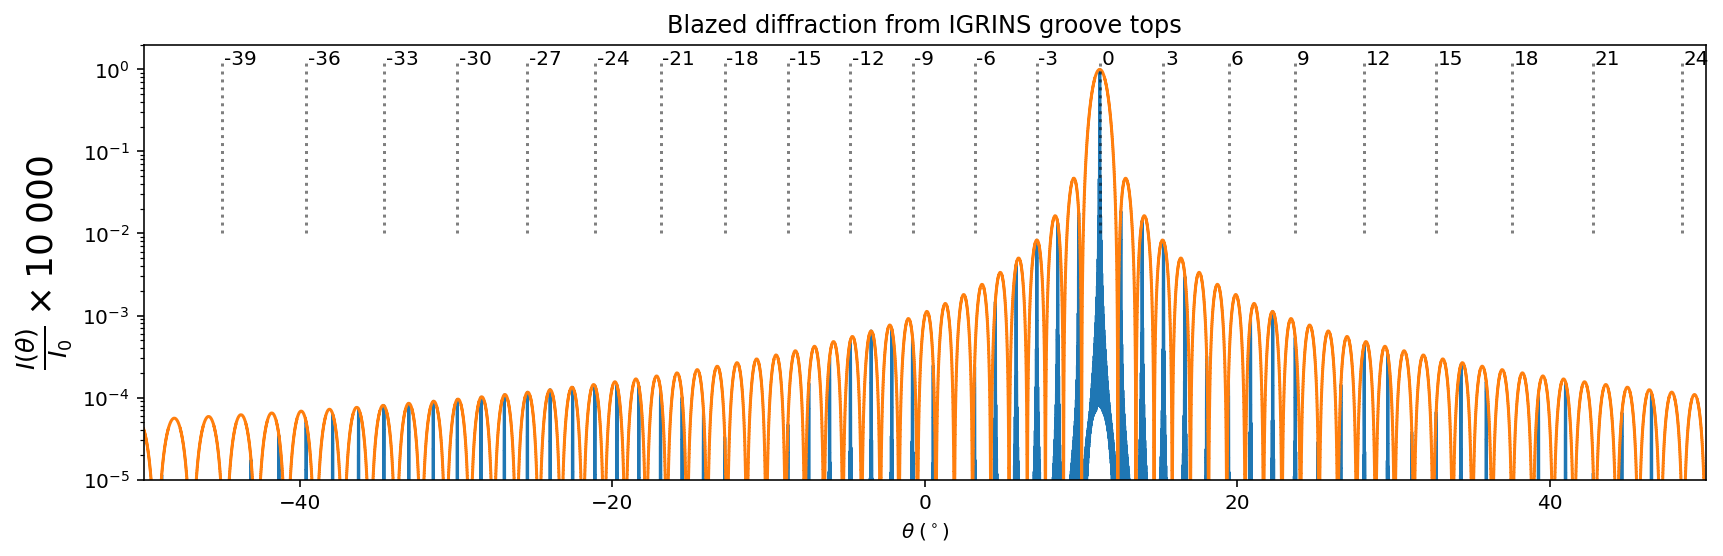

In [41]:
plt.figure(figsize=(14, 4))
plt.step(angular_grid_degrees, blazed_groove_top_diffraction)
plt.step(angular_grid_degrees, blaze_modulation)

x_lo, x_hi = (-50, 50)
plt.xlim(x_lo, x_hi)
plt.ylim(1e-5, 2)
plt.yscale('log')

for m, theta_m in zip(m_vector, theta_m_degrees):
    if np.isfinite(theta_m) & (theta_m>x_lo) & (theta_m < x_hi) & (np.mod(m, 3) ==0):
        plt.text(theta_m+0.1, 1.15, "{:d}".format(-int(m)), rotation='horizontal')
        plt.plot([theta_m, theta_m], [0.01, 1.2], color='k', alpha=0.5, 
                 linestyle='dotted')

plt.xlabel(r'$\theta \; (^\circ)$')
plt.ylabel(r'$\frac{I(\theta)}{I_0} \times 10\;000$', fontsize=18)
plt.title('Blazed diffraction from IGRINS groove tops'.format(beam_size_mm) );